In [21]:
import pandas as pd

from benchmark._plot_util import *

In [22]:
df = pd.read_csv('results/end_to_end.csv')
df = df.groupby("num_samples").mean().reset_index()

df2 = pd.read_csv('results/end_to_end_vqe.csv')
df2 = df2.groupby("num_samples").mean().reset_index()

Text(0.5, 0.96, 'Lower is better ↓')

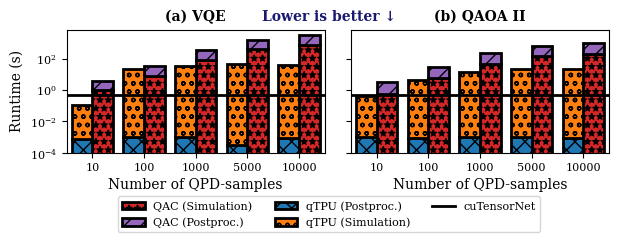

In [85]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(7, 1.6), sharey=True)
fig.subplots_adjust(wspace=0.1)

pretty_names = {
    "ckt_post": "QAC (Postproc.)",
    "ckt_run": "QAC (Simulation)",
    "qtpu_post": "qTPU (Postproc.)",
    "qtpu_run": "qTPU (Simulation)",
}


def plot(df, ax):

    df.plot.bar(
        x="num_samples",
        y=[
            "ckt_run",
            "ckt_post",
        ],
        rot=0,
        width=0.4,
        edgecolor="black",
        linewidth=2,
        ax=ax,
        stacked=True,
        legend=False,
        position=0,
        color=["#d62728", "#9467bd"],
    )

    df.plot.bar(
        x="num_samples",
        y=[
            "qtpu_post",
            "qtpu_run",
        ],
        rot=0,
        width=0.4,
        edgecolor="black",
        linewidth=2,
        ax=ax,
        stacked=True,
        legend=False,
        position=1,  # Set position for the first group of bars
        color=[
            "#1f77b4",
            "#ff7f0e",
        ],
    )

    # ax0.legend(
    #     handles,
    #     [pretty_names.get(label, label) for label in labels],
    #     ncols=2,
    #     # loc="top",
    #     # bbox_to_anchor=(.5, -0.7),
    #     # ncol=2,
    #     # frameon=False,
    # )

    ax.set_yscale("log")
    ax.set_ylim(bottom=0.0001)
    ax.set_xlabel("Number of QPD-samples")
    ax.set_xlim(-0.5, len(df) - 0.5)  # Adjust according to the number of bars

    hatches = ["**", "//", "xx", "oo", "OO"]

    color_to_hatch = {}

    i = 0
    for patch in ax.patches:
        if patch.get_facecolor() not in color_to_hatch:
            color_to_hatch[patch.get_facecolor()] = hatches[i % len(hatches)]
            i += 1

    for patch in ax.patches:
        patch.set_hatch(color_to_hatch[patch.get_facecolor()])


ax0.set_ylabel("Runtime (s)")

ax0.set_title(f"(a) VQE", fontweight="bold", color="black")
ax1.set_title(f"(b) QAOA II", fontweight="bold", color="black")
# plot read horizontal line at 0.45713

ax0.axhline(y=0.468349, color="black", linestyle="-", label="cuTensorNet")
ax1.axhline(y=0.45713, color="black", linestyle="-", label="cuTensorNet")


plot(df2, ax0)
plot(df, ax1)

handles, labels = ax0.get_legend_handles_labels()
fig.legend(
    handles[1:] + [handles[0]],
    [pretty_names.get(label, label) for label in labels][1:] + ["cuTensorNet"],
    loc="lower center",
    bbox_to_anchor=(0.5, -0.42),
    ncol=3,
    # frameon=False,
)
fig.text(
    0.5,
    0.96,
    "Lower is better ↓",
    ha="center",
    va="center",
    fontweight="bold",
    color="midnightblue",
)
# ax0.legend(
#     handles,
#     [pretty_names.get(label, label) for label in labels],
#     # loc="top",
#     bbox_to_anchor=(.5, -0.7),
#     ncol=2,
#     frameon=False,
# )

In [86]:
fig.savefig("end_to_end.pdf", bbox_inches="tight")